In [1]:
# Make the output of plotting commands be displayed inline within the notebook
# Basemap: https://anaconda.org/conda-forge/basemap
# Pygrib: https://anaconda.org/conda-forge/pygrib
# If throws error for outdated libpng, use conda install -c conda-forge libpng

%matplotlib inline 
from mpl_toolkits.basemap import Basemap  # import Basemap matplotlib toolkit
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import LinearSegmentedColormap
import pygrib # import pygrib interface to grib_api

In [2]:
# Open the grib file
grbs = pygrib.open('icedata_2018-03-23T08-54-45_next_6hours.grb2')

In [3]:
for grb in grbs[:10]:
    print(grb)

1:Sea-ice thickness:m (instant):regular_ll:surface:level 0:fcst time 1 hrs:from 201803230000
2:Sea-ice thickness:m (instant):regular_ll:surface:level 0:fcst time 2 hrs:from 201803230000
3:Sea-ice thickness:m (instant):regular_ll:surface:level 0:fcst time 3 hrs:from 201803230000
4:Sea-ice thickness:m (instant):regular_ll:surface:level 0:fcst time 4 hrs:from 201803230000
5:Sea-ice thickness:m (instant):regular_ll:surface:level 0:fcst time 5 hrs:from 201803230000
6:Sea-ice thickness:m (instant):regular_ll:surface:level 0:fcst time 6 hrs:from 201803230000
7:Sea-ice thickness:m (instant):regular_ll:surface:level 0:fcst time 7 hrs:from 201803230000
8:Sea-ice thickness:m (instant):regular_ll:surface:level 0:fcst time 8 hrs:from 201803230000
9:Sea-ice thickness:m (instant):regular_ll:surface:level 0:fcst time 9 hrs:from 201803230000
10:Sea-ice thickness:m (instant):regular_ll:surface:level 0:fcst time 10 hrs:from 201803230000


In [4]:
grb.keys()

['parametersVersion',
 'UseEcmfConventions',
 'GRIBEX_boustrophedonic',
 'hundred',
 'globalDomain',
 'GRIBEditionNumber',
 'tablesVersionLatest',
 'grib2divider',
 'angularPrecision',
 'missingValue',
 'ieeeFloats',
 'isHindcast',
 'section0Length',
 'identifier',
 'discipline',
 'editionNumber',
 'totalLength',
 'sectionNumber',
 'section1Length',
 'numberOfSection',
 'centre',
 'centreDescription',
 'subCentre',
 'tablesVersion',
 'masterDir',
 'localTablesVersion',
 'significanceOfReferenceTime',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second',
 'dataDate',
 'julianDay',
 'dataTime',
 'productionStatusOfProcessedData',
 'typeOfProcessedData',
 'selectStepTemplateInterval',
 'selectStepTemplateInstant',
 'stepType',
 'setCalendarId',
 'deleteCalendarId',
 'is_uerra',
 'sectionNumber',
 'grib2LocalSectionPresent',
 'sectionNumber',
 'gridDescriptionSectionPresent',
 'section3Length',
 'numberOfSection',
 'sourceOfGridDefinition',
 'numberOfDataPoints',
 'numberOfOctectsForNu

In [5]:
grbs.rewind() # rewind the iterator
def grb_to_grid(grb_obj):
    #Takes a single grb object containing multiple levels (ice data has only one level) and/or dates
    #Assumes same time and levels. Compiles to a grid
    n_levels = len(grb_obj)
    levels = np.array([grb_element['level'] for grb_element in grb_obj])
    dates = np.array([grb_element.validDate for grb_element in grb_obj])
    indexes = np.argsort(levels)[::-1] # highest pressure first
    grid = np.zeros([n_levels, grb_obj[0].values.shape[0], grb_obj[1].values.shape[1]])
    for i in range(n_levels):
        grid[i,:,:] = grb_obj[indexes[i]].values
    grid_dict = {'data' : grid, 'units' : grb_obj[0]['units'],
                 'levels' : levels[indexes], 'dates': dates}
    return grid_dict

In [6]:
grb = grbs.select(name='Sea-ice cover')
grb_concentration = grb_to_grid(grb)

In [7]:
#print(grb_concentration)
print(grb_concentration['units'])
print(grb_concentration['levels'][10])

(0 - 1)
0


In [8]:
grbs.rewind() # rewind the iterator
for grb in grbs:
    lats, lons = grb.latlons()  # get the lats and lons for the grid.
#lats, lons = grb.latlons()  # get the lats and lons for the grid.

In [ ]:
def plot_grb(grb, datetime):
    f = plt.figure(figsize=[12,10])
    m = Basemap(llcrnrlon = lons.min(),llcrnrlat = lats.min(), urcrnrlon = lons.max(),
               urcrnrlat = lats.max(),
               projection = 'mill', area_thresh =1000 ,
               resolution='l')
    x, y = m(lons, lats)
    #palette = plt.cm.jet
    #palette.set_bad(ax.get_axis_bgcolor(), 1.0)
    my_mesh = m.pcolor(x, y, grb, cmap='jet')
    my_coast = m.drawcoastlines(linewidth=1)
    t = plt.title(datetime)
    plt.colorbar()

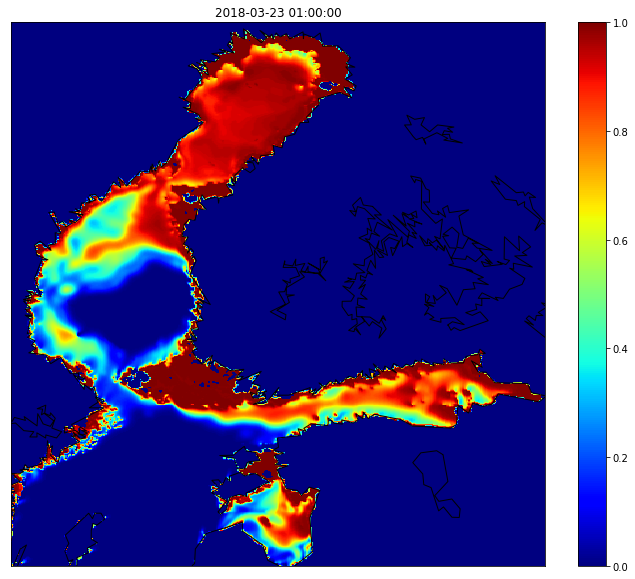

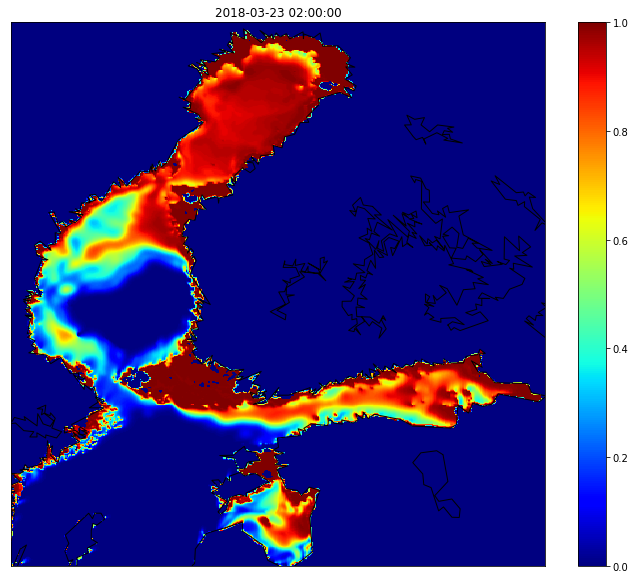

In [ ]:
for i in range(0 , 4):
    test = grb_concentration['data'][i]
    test[test == 9999.0] = 0
    plot_grb(test, grb_concentration['dates'][i])

In [ ]:
f = plt.figure(figsize=[12,10])
m = Basemap(llcrnrlon = lons.min(),llcrnrlat = lats.min(), urcrnrlon = lons.max(),
           urcrnrlat = lats.max(),
           projection = 'mill', area_thresh =1000 ,
           resolution='l')
x, y = m(lons, lats)
my_mesh = m.pcolor(x, y, grb_concentration['data'][0], vmin=0.1,vmax=1, cmap='jet')
my_coast = m.drawcoastlines(linewidth=1.)
plt.colorbar()

In [ ]:
# Get ice thicknesses and visualize the first 4 forecasts
grb = grbs.select(name='Sea-ice thickness')
grb_thickness = grb_to_grid(grb)
print(grb_thickness['units'])
for i in range(0 , 4):
    test = grb_thickness['data'][i]
    test[test == 9999.0] = 0
    plot_grb(test, grb_thickness['dates'][i])